In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Defining the datasets and tools
datasets = ['lasry', 'vangalen', 'similie']
tools = ['nn', 'cpdb', 'community']

In [40]:
# Function to read the data from the file and correct the column names
def read_data(dataset, tool):
    file_path = f'./activity_{dataset}_{tool}.txt'
    data = pd.read_csv(file_path, delimiter='\\s+', comment='#')
    # Renaming the columns to remove extra spaces
    data.columns = ['Elapsed_time', 'CPU', 'Real_MB', 'Virtual_MB']
    return data

# # Plotting CPU usage for each tool across the three datasets
# plt.figure(figsize=(15, 5))
# for dataset in datasets:
#     for tool in tools:
#         data = read_data(dataset, tool)
#         plt.plot(data['Elapsed_time'], data['CPU'], label=f'{tool} - {dataset}')
# plt.xlabel('Elapsed Time (seconds)')
# plt.ylabel('CPU Usage (%)')
# plt.legend()
# plt.title('CPU Usage Benchmarking across Tools and Datasets')
# plt.show()

# CPU usage

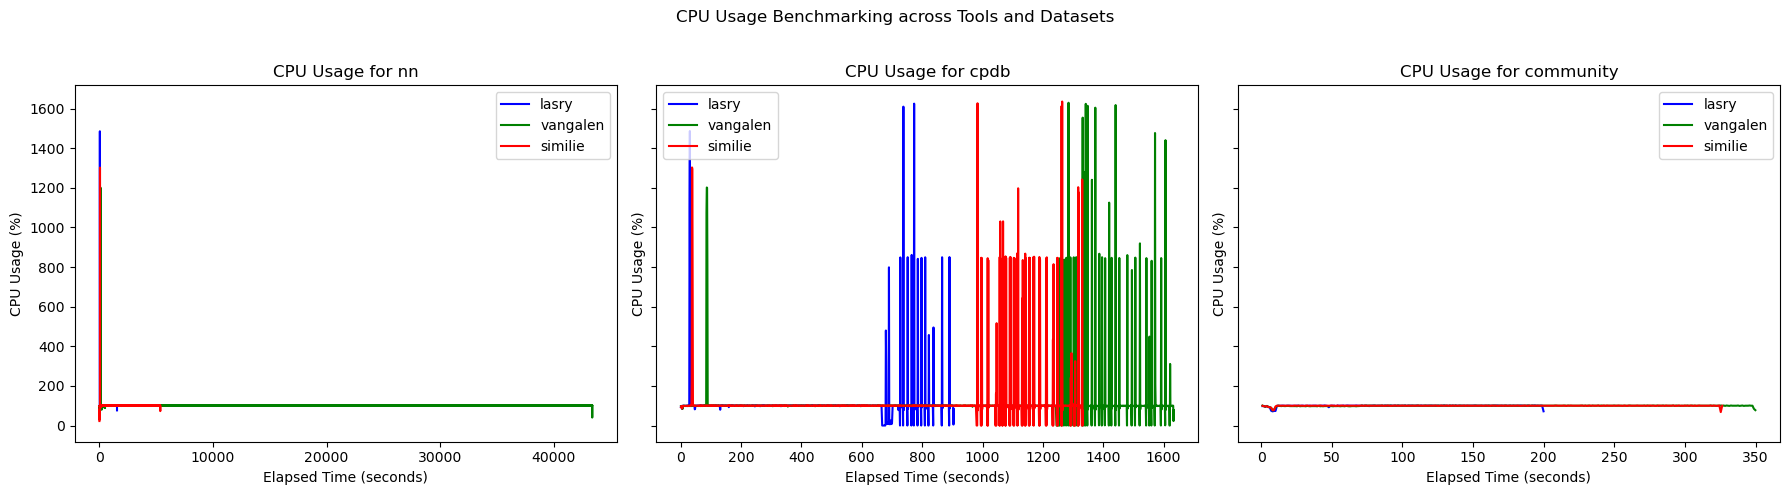

In [41]:
# Define distinct colors for each dataset
colors = {'lasry': 'b', 'vangalen': 'g', 'similie': 'r'}

# Create subplots for each tool
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate through tools and datasets to plot CPU usage
for i, tool in enumerate(tools):
    for dataset in datasets:
        data = read_data(dataset, tool)
        axes[i].plot(data['Elapsed_time'], data['CPU'], label=f'{dataset}', color=colors[dataset])
    axes[i].set_xlabel('Elapsed Time (seconds)')
    axes[i].set_ylabel('CPU Usage (%)')
    axes[i].legend()
    axes[i].set_title(f'CPU Usage for {tool}')

plt.suptitle('CPU Usage Benchmarking across Tools and Datasets')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# RAM usage

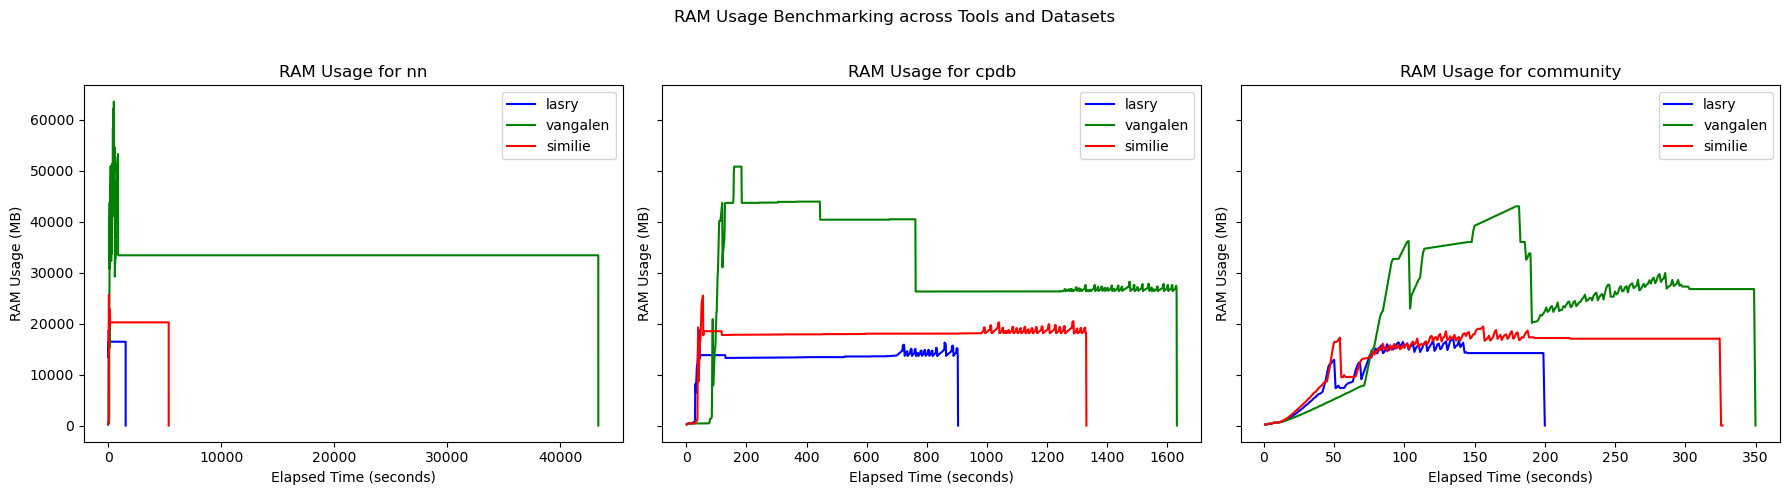

In [42]:
# Create subplots for each tool to plot RAM (Real MB) usage
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate through tools and datasets to plot RAM usage
for i, tool in enumerate(tools):
    for dataset in datasets:
        data = read_data(dataset, tool)
        axes[i].plot(data['Elapsed_time'], data['Real_MB'], label=f'{dataset}', color=colors[dataset])
    axes[i].set_xlabel('Elapsed Time (seconds)')
    axes[i].set_ylabel('RAM Usage (MB)')
    axes[i].legend()
    axes[i].set_title(f'RAM Usage for {tool}')

plt.suptitle('RAM Usage Benchmarking across Tools and Datasets')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [43]:
tools = ['nn', 'cpdb', 'community', "DEGs"]

In [55]:
n_genes={'lasry':484944, 'similie': 614199, 'vangalen':2394415}

In [65]:
# Function to get the peak values for CPU and RAM usage for each tool and dataset
def get_peak_values():
    peak_values = {'Tool': [], 'Dataset': [], 'Number_of_genes':[], 'Peak_CPU': [], 'Peak_RAM_MB': [], 'Elapsed_time(sec)':[]}
    for tool in tools:
        for dataset in datasets:
            data = read_data(dataset, tool)
            peak_values['Tool'].append(tool)
            peak_values['Dataset'].append(dataset)
            peak_values['Number_of_genes'].append(n_genes[dataset])
            peak_values['Peak_CPU'].append(data['CPU'].max())
            peak_values['Peak_RAM_MB'].append(data['Real_MB'].max())
            peak_values['Elapsed_time(sec)'].append(data['Elapsed_time'].max())
    return pd.DataFrame(peak_values)

# Get the peak values and display them in a table
peak_values_table = get_peak_values()
peak_values_table


,Tool,Dataset,Number_of_genes,Peak_CPU,Peak_RAM_MB,Elapsed_time(sec)
0,nn,lasry,484944,1485.0,18763.355,1549.543
1,nn,vangalen,2394415,1200.7,63567.391,43379.409
2,nn,similie,614199,1301.8,25695.684,5359.870
3,cpdb,lasry,484944,1624.5,18702.066,904.670
4,cpdb,vangalen,2394415,1629.0,50793.500,1633.565
5,cpdb,similie,614199,1635.2,25508.273,1332.194
6,community,lasry,484944,101.3,17119.355,199.910
7,community,vangalen,2394415,101.1,43011.637,349.824
8,community,similie,614199,101.1,19432.617,326.361
9,DEGs,lasry,484944,1500.9,18638.027,74.407


In [66]:
peak_values_table.to_csv("resource_usage.csv")

In [67]:
peak_values_table=peak_values_table[peak_values_table.Tool!="DEGs"]

In [68]:
import seaborn as sns

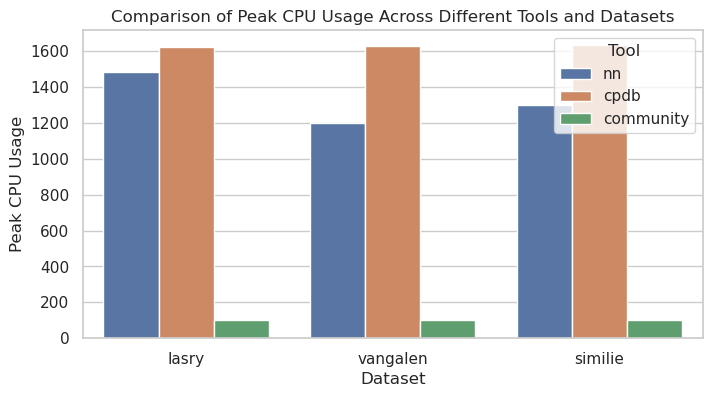

In [69]:
sns.set(style="whitegrid")

# Peak CPU Usage
plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Peak_CPU', hue='Tool', data=peak_values_table)
plt.title('Comparison of Peak CPU Usage Across Different Tools and Datasets')
plt.ylabel('Peak CPU Usage')
plt.xlabel('Dataset')
plt.show()

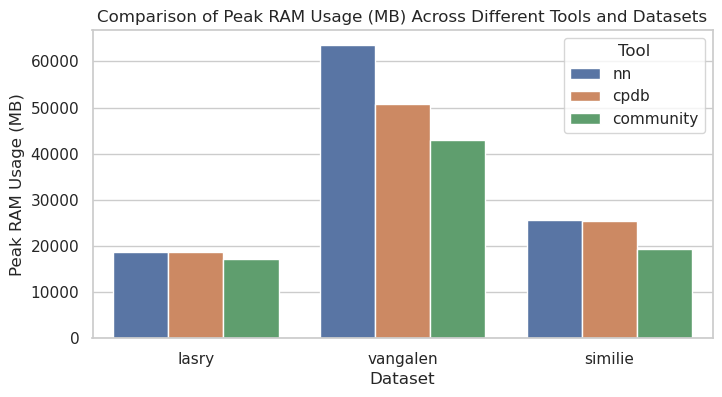

In [70]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Peak_RAM_MB', hue='Tool', data=peak_values_table)
plt.title('Comparison of Peak RAM Usage (MB) Across Different Tools and Datasets')
plt.ylabel('Peak RAM Usage (MB)')
plt.xlabel('Dataset')
plt.show()

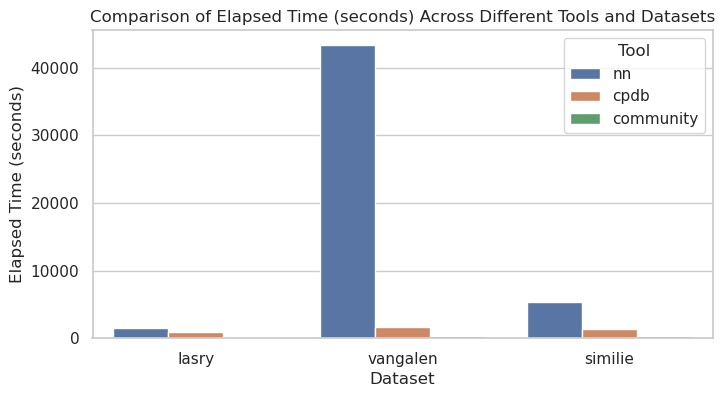

In [71]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Elapsed_time(sec)', hue='Tool', data=peak_values_table)
plt.title('Comparison of Elapsed Time (seconds) Across Different Tools and Datasets')
plt.ylabel('Elapsed Time (seconds)')
plt.xlabel('Dataset')
plt.show()

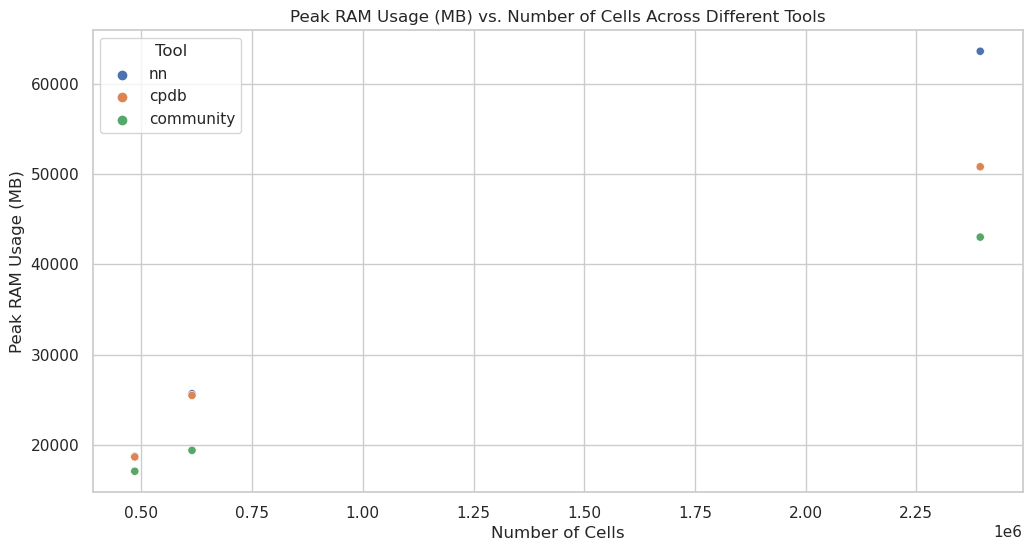

In [72]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number_of_genes', y='Peak_RAM_MB', hue='Tool', data=peak_values_table)
plt.title('Peak RAM Usage (MB) vs. Number of Cells Across Different Tools')
plt.ylabel('Peak RAM Usage (MB)')
plt.xlabel('Number of Cells')
plt.show()

In [73]:
peak_values_table

,Tool,Dataset,Number_of_genes,Peak_CPU,Peak_RAM_MB,Elapsed_time(sec)
0,nn,lasry,484944,1485.0,18763.355,1549.543
1,nn,vangalen,2394415,1200.7,63567.391,43379.409
2,nn,similie,614199,1301.8,25695.684,5359.870
3,cpdb,lasry,484944,1624.5,18702.066,904.670
4,cpdb,vangalen,2394415,1629.0,50793.500,1633.565
5,cpdb,similie,614199,1635.2,25508.273,1332.194
6,community,lasry,484944,101.3,17119.355,199.910
7,community,vangalen,2394415,101.1,43011.637,349.824
8,community,similie,614199,101.1,19432.617,326.361


In [19]:
cpdb=pd.read_csv("../../results/method_comparison/compare_algorithms/Similie/CPDB/CPDB_significant_weights.csv")

In [20]:
community=pd.read_csv("../../results/method_comparison/compare_algorithms/Similie/community/community_anno_interactions.csv")

In [74]:
for x in cpdb.interaction_ID.to_list():
    if x not in community.interaction_ID.to_list():
        print(x)

Endothelial:CCN1_B-cells:SDC4
Endothelial:CCN1_Endothelial:SDC4
Endothelial:CCN1_Epithelial:SDC4
Endothelial:CCN1_Fibroblasts:SDC4
Endothelial:CCN1_Mast:SDC4
Endothelial:CCN1_Myeloid:SDC4
Endothelial:CCN1_Plasma:SDC4
Endothelial:CCN1_T-cells:SDC4
Endothelial:CCN1_B-cells:ITGAV
Endothelial:CCN1_Endothelial:ITGB5
Endothelial:CCN1_Lymphocytes:ITGB5
Endothelial:CCN1_Mast:ITGB5


In [82]:
community[community.sending_cell_type=="Endothelial"].ligand_gene_name.unique()

array(['A2M', 'ACTR2', 'ADCYAP1', 'ADM', 'ADM2', 'ADO', 'AGRN', 'AGT',
       'ALCAM', 'ANG', 'ANGPT2', 'ANGPTL1', 'ANGPTL2', 'ANGPTL4',
       'ANP32B', 'ANXA1', 'APLN', 'APOD', 'APOE', 'APOO', 'AREG', 'ARF4',
       'ARF6', 'ARPC5', 'ASRGL1', 'AZGP1', 'B2M', 'BAG6', 'BGN', 'BMP1',
       'BMP2', 'BMP4', 'BMP5', 'BMP7', 'BMP8B', 'C1QA', 'C1QTNF1', 'CALR',
       'CCL11', 'CCL13', 'CCL14', 'CCL15', 'CCL18', 'CCL19', 'CCL2',
       'CCL20', 'CCL21', 'CCL22', 'CCL23', 'CCL26', 'CCL28', 'CCL3',
       'CCL3L1', 'CCL4', 'CCL5', 'CCL7', 'CCL8', 'CD160', 'CD1D', 'CD200',
       'CD274', 'CD34', 'CD40LG', 'CD48', 'CD52', 'CD58', 'CD59', 'CD70',
       'CD99', 'CEACAM5', 'CEACAM6', 'CFH', 'CGN', 'CIRBP', 'CKLF',
       'CLCF1', 'CLEC11A', 'CLU', 'CNTN4', 'COL14A1', 'COL16A1',
       'COL18A1', 'COL1A1', 'COL1A2', 'COL3A1', 'COL4A1', 'COL4A2',
       'COL4A5', 'COL5A1', 'COL5A2', 'COL6A1', 'COL6A2', 'COL6A3',
       'COL7A1', 'COL8A1', 'COL9A2', 'COL9A3', 'COPA', 'CSF1', 'CSF2',
       'CSF3', 

In [80]:
community.sending_cell_type.unique()

array(['Epithelial', 'Fibroblasts', 'Endothelial', 'Myeloid', 'Mast',
       'Lymphocytes', 'T-cells', 'Plasma', 'B-cells'], dtype=object)